A quick and easy analysis of this dataset to answer the following:

1. Who removed the most number of posts from the website?
2. A pie chart of who removes the post from the website
3. Whose posts were removed most frequently?
4. Most Popular posts, by awards received
5. Comments distribution d) Conclusion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df= pd.read_csv("C:\kaggle datasets\Reddit Data.csv",low_memory=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     190853 non-null  object 
 1   title                  190852 non-null  object 
 2   score                  190853 non-null  int64  
 3   author                 190853 non-null  object 
 4   author_flair_text      28845 non-null   object 
 5   removed_by             20744 non-null   object 
 6   total_awards_received  65146 non-null   float64
 7   awarders               54478 non-null   object 
 8   created_utc            190853 non-null  int64  
 9   full_link              190853 non-null  object 
 10  num_comments           190853 non-null  int64  
 11  over_18                190853 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 16.2+ MB


In [12]:
df.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube ...,1,OmarZiada,OC: 1,NaN,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the...,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,ll15gx,Immunization in India. Source: https://niti.go...,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,ll0iup,How to quickly estimate the impact of players ...,1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,ll0g9a,How to quickly estimate the impact of players ...,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [28]:
# !pip install pandasql

In [8]:
import pandasql as ps

Let's check the missing values

In [13]:
df.isnull().sum().sort_values(ascending=False)

removed_by               170109
author_flair_text        162008
awarders                 136375
total_awards_received    125707
title                         1
id                            0
score                         0
author                        0
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

We can see that there are a lot of missing values in this dataset. However, because the data is being used for Exploratory Purposes, the missing values do not bother us much.

In [14]:
# Basic Data Exploration

In [16]:
df.describe()

,score,total_awards_received,created_utc,num_comments
count,190853.000000,65146.000000,1.908530e+05,190853.000000
mean,176.016159,0.013109,1.512494e+09,27.604732
std,1951.936524,0.589425,6.822624e+07,213.236378
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.463862e+09,1.000000
50%,1.000000,0.000000,1.518662e+09,2.000000
75%,4.000000,0.000000,1.576576e+09,5.000000
max,116226.000000,93.000000,1.613474e+09,18801.000000


Based on the information provided, we can conclude that the "score" variable is heavily skewed towards the lower values, based on the quartile distribution.

This suggests that the majority of the data points have very low scores, with only a small number of data points having high scores. The presence of outliers with a very high score may also suggest that there are some extreme values that are skewing the distribution.

In [17]:
# *Checking who removed the most Posts*

In [18]:
removed_posts = """SELECT removed_by, count(distinct id) as posts_removed 
                    FROM df
                    WHERE removed_by is not null
                    GROUP BY removed_by"""
df_removed_posts = ps.sqldf(removed_posts, locals())
df_removed_posts

,removed_by,posts_removed
0,author,1
1,automod_filtered,1553
2,deleted,2948
3,moderator,14789
4,reddit,1453


Making a bar graph for the table above

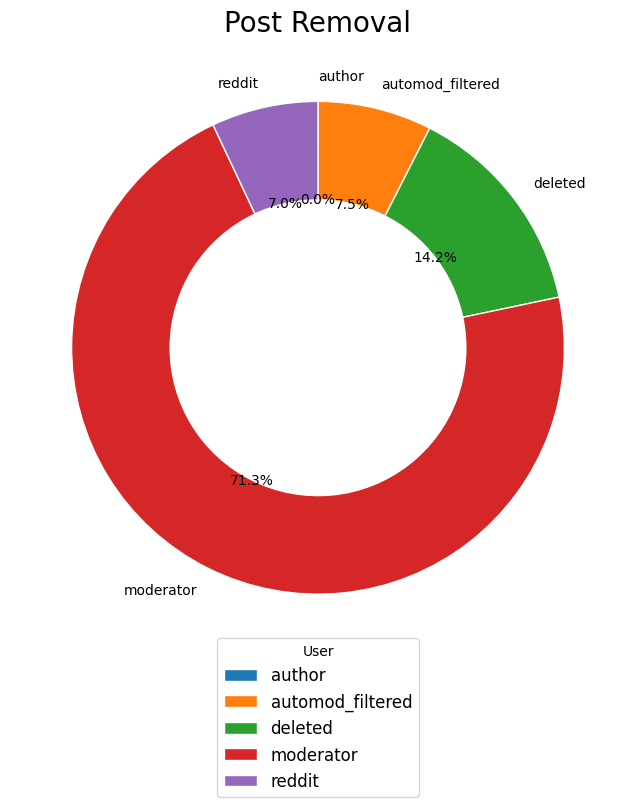

In [20]:
removed_by = df_removed_posts['removed_by'].tolist()
number_of_removed_posts = df_removed_posts['posts_removed'].tolist()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(number_of_removed_posts, labels=removed_by, autopct='%1.1f%%', startangle=90,
       counterclock=False, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add title and legend
ax.set_title('Post Removal', fontsize=20)
ax.legend(title='User', loc='center', bbox_to_anchor=(0.5, -0.1), fontsize=12)
plt.show()

We can see that most posts are removed by the moderator, showing that Reddit Moderators, who are generally unpaid, are actively enforcing subreddit rules to regulate their subreddit. The next question is, whose posts were removed most frequently?

In [21]:
top_removed = """SELECT author, count(id) as number_of_removed_posts
FROM df  
WHERE removed_by is not null
GROUP BY author 
ORDER BY 2 desc 
limit 10"""
df_top_removed = ps.sqldf(top_removed, locals())
df_top_removed

,author,number_of_removed_posts
0,[deleted],2955
1,hornedviper9,235
2,RohanBAbu150,62
3,Mostafa_Dahroug,45
4,peter_mladenov,35
5,PerfctSmile,31
6,Lifeinsider123,28
7,licensecrack,26
8,elizabeth010258,24
9,Lisa580,22


We can safely omit the first row, as the database categorises "deleted" as an author when it cannot directly attribute a post to an individual.

In [22]:
df_top_removed = df_top_removed.drop([0])

In [23]:
df_top_removed

,author,number_of_removed_posts
1,hornedviper9,235
2,RohanBAbu150,62
3,Mostafa_Dahroug,45
4,peter_mladenov,35
5,PerfctSmile,31
6,Lifeinsider123,28
7,licensecrack,26
8,elizabeth010258,24
9,Lisa580,22


Now, lets see the most popular posts, by total_awards_received

In [25]:
popular_posts = """SELECT title, total_awards_received as awards_received 
FROM df  
where title != 'data_irl'
order by 2 desc 
limit 10"""
df_popular_posts = ps.sqldf(popular_posts, locals())
df_popular_posts

,title,awards_received
0,Robinhood is getting wrecked in the App Store ...,93.0
1,How many leaders the Queen saw coming and goin...,55.0
2,Citadel paid $88 million to Robinhood in Q3 20...,54.0
3,[OC] Vegetation of Africa 2019,38.0
4,Number of Wilhelm Screams per Lord of the Ring...,31.0
5,[OC] Most Popular Programming Languages accord...,30.0
6,Race and Hispanic origin by county [OC],27.0
7,[OC] Fails-To-Deliver data on GameStop (GME),24.0
8,Highest Grossing Box Office Bald Actors of Hol...,21.0
9,The best (&amp; worst) countries for raising a...,18.0


# Comments Distribution
As seen in our quick statistics, an average reddit post has 28 comments. Lets see how the comments are distributed using a bar chart

In [33]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

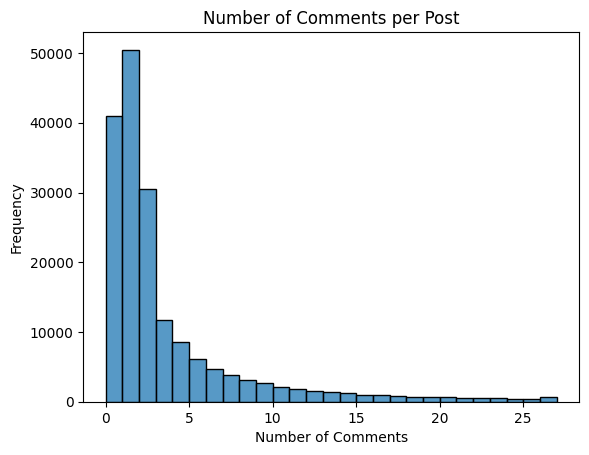

In [34]:
subset = df[df['num_comments'] < 28]
sns.histplot(data=subset, x='num_comments', binwidth=1)

# set the plot title and axis labels
plt.title('Number of Comments per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

# display the plot
plt.show()

As we can see, most posts still have less than 5 comments per post. From this, we can conclude that there are posts with an extremely high number of post which takes the mean to a very high value.

# CONCLUSION
As we can see from the beginning, the dataset has a lot of outliers. The data, although heavily skewed, is consistent with what we should expect from a social media dataset, as there are very few posts with a lot of likes/awards or comments, while others garner very few peoples eye.